# Distance Reference Measurement

This notebook will be used as a reference for distance measurements.
Using the reference time series datasets several distances will be calculated and compared.
Both time series references are as similar as one can get, therefore this shall be used as "ground truth".

## Imports

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import math
from functools import reduce
sns.set()
%matplotlib inline
import os

In [18]:
import sys
print(sys.version)

3.9.0 (default, Nov 21 2020, 14:55:42) 
[Clang 12.0.0 (clang-1200.0.32.27)]


## Globals

In [2]:
REF_PATH_CLEAN = 'data/cleaned/reference/'
IMAGES_DIR = 'images/reference/'
#THRESHOLD = 715

FILE_1MIN = REF_PATH_CLEAN + 'ref_1min.csv'
FILE_5MIN = REF_PATH_CLEAN + 'ref_5min.csv'
FILE_30MIN = REF_PATH_CLEAN + 'ref_30min.csv'
FILE_1HOUR = REF_PATH_CLEAN + 'ref_1hour.csv'

# Calculate distances for 1hour reference time series

### Read

In [3]:
df1h = pd.read_csv(FILE_1HOUR, index_col='timestamp')

In [4]:
df1h.head()

,heart_rate_1,respiration_rate_1,mss1,heart_rate_2,respiration_rate_2,mss2
timestamp,,,,,,
2020-10-11 20:00:00+00:00,0.000000,0.000000,400.312500,0.000000,0.000000,366.443080
2020-10-11 21:00:00+00:00,4.204167,0.731944,493.442500,3.639444,0.661389,472.840278
2020-10-11 22:00:00+00:00,64.477222,10.563056,988.582778,62.617222,11.774444,992.590000
2020-10-11 23:00:00+00:00,46.755556,8.228333,1483.576944,48.901389,8.349167,1547.963056
2020-10-12 00:00:00+00:00,68.876944,13.658611,2427.001111,71.012778,13.352222,2516.149722


### Normalise Data

In [5]:
mean_1h = df1h.mean()
std_1h = df1h.std()

In [6]:
df1h_normal = (df1h-mean_1h)/std_1h

In [7]:
df1h_normal.head()

,heart_rate_1,respiration_rate_1,mss1,heart_rate_2,respiration_rate_2,mss2
timestamp,,,,,,
2020-10-11 20:00:00+00:00,-1.554897,-1.489234,-1.269872,-1.544623,-1.468481,-1.258079
2020-10-11 21:00:00+00:00,-1.395980,-1.352252,-1.109433,-1.409919,-1.346827,-1.084242
2020-10-11 22:00:00+00:00,0.882343,0.487621,-0.256434,0.772977,0.697269,-0.235050
2020-10-11 23:00:00+00:00,0.212463,0.050682,0.596314,0.265324,0.067236,0.672345
2020-10-12 00:00:00+00:00,1.048652,1.066948,2.221591,1.083715,0.987480,2.254215


### Transpose

In [8]:
df1h_matrix = df1h_normal.transpose()

In [9]:
df1h_matrix

timestamp,2020-10-11 20:00:00+00:00,2020-10-11 21:00:00+00:00,2020-10-11 22:00:00+00:00,2020-10-11 23:00:00+00:00,2020-10-12 00:00:00+00:00,2020-10-12 01:00:00+00:00,2020-10-12 02:00:00+00:00,2020-10-12 03:00:00+00:00,2020-10-12 04:00:00+00:00,2020-10-12 05:00:00+00:00,2020-10-12 06:00:00+00:00,2020-10-12 07:00:00+00:00,2020-10-12 08:00:00+00:00,2020-10-12 09:00:00+00:00,2020-10-12 10:00:00+00:00
heart_rate_1,-1.554897,-1.395980,0.882343,0.212463,1.048652,0.777332,0.653359,0.627172,0.519378,0.565620,0.516806,0.658105,-0.400558,-1.554897,-1.554897
respiration_rate_1,-1.489234,-1.352252,0.487621,0.050682,1.066948,1.043659,1.033885,0.911615,0.288620,0.356409,0.677576,0.439274,-0.536338,-1.489234,-1.489234
mss1,-1.269872,-1.109433,-0.256434,0.596314,2.221591,0.790594,1.005986,0.133559,-0.030811,-0.014919,0.309746,0.682377,-0.465352,-1.258866,-1.334480
heart_rate_2,-1.544623,-1.409919,0.772977,0.265324,1.083715,0.834941,0.693658,0.568001,0.458425,0.659092,0.497544,0.651464,-0.441352,-1.544623,-1.544623
respiration_rate_2,-1.468481,-1.346827,0.697269,0.067236,0.987480,1.101265,1.093857,0.881665,0.261084,0.191239,0.600089,0.479202,-0.608118,-1.468481,-1.468481
mss2,-1.258079,-1.084242,-0.235050,0.672345,2.254215,0.938449,0.947188,0.092922,-0.190202,0.004139,0.202537,0.629417,-0.446282,-1.269798,-1.257558


### Euclidean distance

In [19]:
from sklearn.metrics.pairwise import euclidean_distances

In [20]:
hr_1h = df1h_matrix.loc[['heart_rate_1', 'heart_rate_2']]
rr_1h = df1h_matrix.loc[['respiration_rate_1', 'respiration_rate_2']]
mss_1h = df1h_matrix.loc[['mss1', 'mss2']]

In [21]:
dist_matrix_1h_hr = euclidean_distances(hr_1h, hr_1h)
dist_matrix_1h_rr = euclidean_distances(rr_1h, rr_1h)
dist_matrix_1h_mss = euclidean_distances(mss_1h, mss_1h)

In [22]:
print("Dist-Matrix HR-1h")
print(dist_matrix_1h_hr)
print("Dist-Matrix RR-1h")
print(dist_matrix_1h_rr)
print("Dist-Matrix MSS-1h")
print(dist_matrix_1h_mss)


Dist-Matrix HR-1h
[[0.         0.19867312]
 [0.19867312 0.        ]]
Dist-Matrix RR-1h
[[0.00000000e+00 3.16962406e-01]
 [3.16962406e-01 5.96046448e-08]]
Dist-Matrix MSS-1h
[[0.         0.28550501]
 [0.28550501 0.        ]]


Euclidean Distance between the HR 1h: 0.199

Euclidean Distance between the RR 1h: 0.317

Euclidean Distance between the MSS 1h: 0.28

In [47]:
#fig = plt.figure(figsize=(10, 10))
#plt.matshow(dist_matrix_1h_hr, fignum=fig.number, cmap='coolwarm')
#plt.clim(0, 1)
#plt.title('Euclidian Distance for 1h Reference HR', size=24)

#ax = plt.gca()
#ax.grid(False)

#color_bar = plt.colorbar()
#color_bar.ax.tick_params(labelsize=12)

### DTW

In [24]:
# https://dtaidistance.readthedocs.io/en/latest/index.html
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

In [25]:
hr1_1h = df1h_matrix.loc['heart_rate_1']
hr2_1h = df1h_matrix.loc['heart_rate_2']

rr1_1h = df1h_matrix.loc['respiration_rate_1']
rr2_1h = df1h_matrix.loc['respiration_rate_2']

mss1_1h = df1h_matrix.loc['mss1']
mss2_1h = df1h_matrix.loc['mss2']

In [26]:
hr_1h_distance = dtw.distance(hr1_1h, hr2_1h)
print(hr_1h_distance)

0.1986731186938204


In [28]:
rr_1h_distance = dtw.distance(rr1_1h, rr2_1h)
print(rr_1h_distance)

0.31696240626793826


In [29]:
mss_1h_distance = dtw.distance(mss1_1h, mss2_1h)
print(mss_1h_distance)

0.2855050086505903


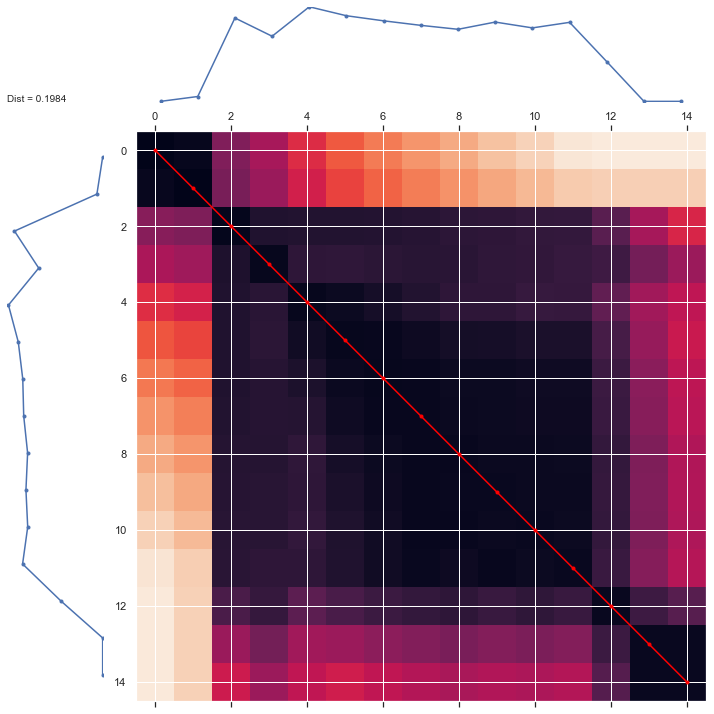

In [52]:
d, paths = dtw.warping_paths(hr1_1h, hr2_1h)
best_path = dtw.best_path(paths)
fig = dtwvis.plot_warpingpaths(hr1_1h, hr2_1h, paths, best_path)[0]

In [31]:
fig.savefig(IMAGES_DIR + 'ref_1hour_hr_dtw.png')

(<Figure size 720x720 with 4 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x11f376ad0>])

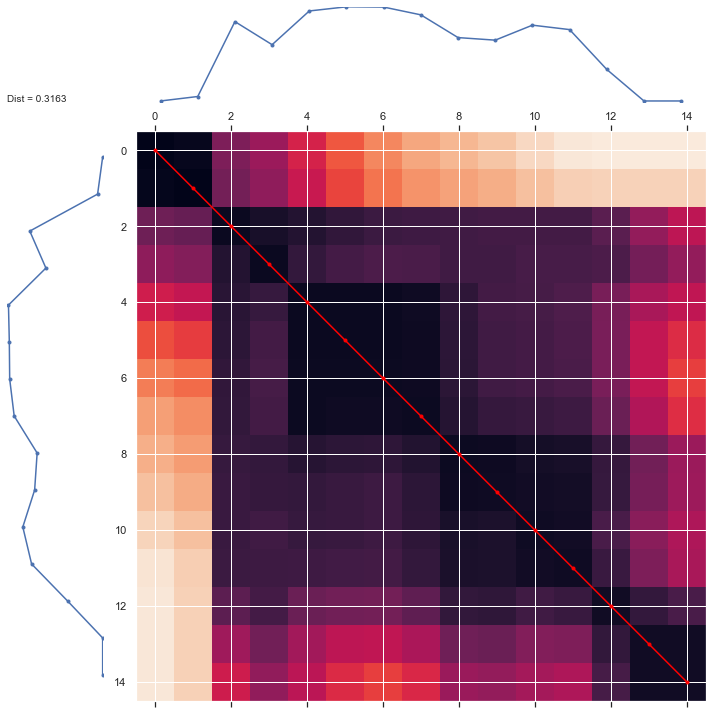

In [171]:
d, paths = dtw.warping_paths(rr1_1h, rr2_1h)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(rr1_1h, rr2_1h, paths, best_path)

# Calculate distances for 30min reference time series

### Read

In [30]:
df30m = pd.read_csv(FILE_30MIN, index_col='timestamp')

In [31]:
df30m.head()

,heart_rate_1,respiration_rate_1,mss1,heart_rate_2,respiration_rate_2,mss2
timestamp,,,,,,
2020-10-11 20:00:00+00:00,0.000000,0.000000,380.998879,0.000000,0.000000,369.635090
2020-10-11 20:30:00+00:00,0.000000,0.000000,419.454444,0.000000,0.000000,363.279444
2020-10-11 21:00:00+00:00,0.000000,0.000000,389.723333,0.000000,0.000000,363.159444
2020-10-11 21:30:00+00:00,8.408333,1.463889,597.161667,7.278889,1.322778,582.521111
2020-10-11 22:00:00+00:00,73.778333,11.526667,1137.622778,73.254444,15.025556,1156.466667


### Normalise Data

In [32]:
mean_30m = df30m.mean()
std_30m = df30m.std()

In [33]:
df30_normal = (df30m - mean_30m)/std_30m

In [34]:
df30_normal.head()

,heart_rate_1,respiration_rate_1,mss1,heart_rate_2,respiration_rate_2,mss2
timestamp,,,,,,
2020-10-11 20:00:00+00:00,-1.582695,-1.532616,-1.323549,-1.574154,-1.495760,-1.271627
2020-10-11 20:30:00+00:00,-1.582695,-1.532616,-1.258557,-1.574154,-1.495760,-1.281814
2020-10-11 21:00:00+00:00,-1.582695,-1.532616,-1.308804,-1.574154,-1.495760,-1.282006
2020-10-11 21:30:00+00:00,-1.269962,-1.260070,-0.958223,-1.308748,-1.256194,-0.930405
2020-10-11 22:00:00+00:00,1.161362,0.613416,-0.044815,1.096884,1.225493,-0.010464


### Transpose

In [35]:
df30m_matrix = df30_normal.transpose()

In [36]:
df30m_matrix

timestamp,2020-10-11 20:00:00+00:00,2020-10-11 20:30:00+00:00,2020-10-11 21:00:00+00:00,2020-10-11 21:30:00+00:00,2020-10-11 22:00:00+00:00,2020-10-11 22:30:00+00:00,2020-10-11 23:00:00+00:00,2020-10-11 23:30:00+00:00,2020-10-12 00:00:00+00:00,2020-10-12 00:30:00+00:00,...,2020-10-12 05:30:00+00:00,2020-10-12 06:00:00+00:00,2020-10-12 06:30:00+00:00,2020-10-12 07:00:00+00:00,2020-10-12 07:30:00+00:00,2020-10-12 08:00:00+00:00,2020-10-12 08:30:00+00:00,2020-10-12 09:00:00+00:00,2020-10-12 09:30:00+00:00,2020-10-12 10:00:00+00:00
heart_rate_1,-1.582695,-1.582695,-1.582695,-1.269962,1.161362,0.469484,-0.559013,0.871606,1.026495,0.931631,...,0.457707,0.483990,0.427518,0.652971,0.536598,0.533064,-1.426835,-1.582695,-1.582695,-1.582695
respiration_rate_1,-1.532616,-1.532616,-1.532616,-1.260070,0.613416,0.254606,-0.599131,0.597798,0.968916,1.051766,...,0.053635,0.367142,0.878826,0.640515,0.131314,0.221197,-1.390499,-1.532616,-1.532616,-1.532616
mss1,-1.323549,-1.258557,-1.308804,-0.958223,-0.044815,-0.548586,-0.090283,1.170013,2.266765,2.001836,...,-0.349433,-0.049104,0.566574,0.977047,0.271543,0.189178,-1.192488,-1.334082,-1.226139,-1.354290
heart_rate_2,-1.574154,-1.574154,-1.574154,-1.308748,1.096884,0.321165,-0.414303,0.832126,1.004796,1.025499,...,0.599313,0.481519,0.393847,0.672116,0.506516,0.506516,-1.481053,-1.574154,-1.574154,-1.574154
respiration_rate_2,-1.495760,-1.495760,-1.495760,-1.256194,1.225493,0.047886,-0.507915,0.540601,0.767188,1.077688,...,-0.121350,0.276888,0.805120,0.707020,0.136931,0.106948,-1.404200,-1.495760,-1.495760,-1.495760
mss2,-1.271627,-1.281814,-1.282006,-0.930405,-0.010464,-0.535799,0.042611,1.191471,2.179549,2.158224,...,-0.324323,-0.095959,0.408260,0.868626,0.281229,0.262048,-1.222756,-1.287823,-1.288655,-1.276232


### Euclidean distance

In [37]:
from sklearn.metrics.pairwise import euclidean_distances

In [38]:
hr_30m = df30m_matrix.loc[['heart_rate_1', 'heart_rate_2']]
rr_30m = df30m_matrix.loc[['respiration_rate_1', 'respiration_rate_2']]
mss_30m = df30m_matrix.loc[['mss1', 'mss2']]

In [39]:
dist_matrix_30m_hr = euclidean_distances(hr_30m, hr_30m)
dist_matrix_30m_rr = euclidean_distances(rr_30m, rr_30m)
dist_matrix_30m_mss = euclidean_distances(mss_30m, mss_30m)

In [40]:
print(dist_matrix_30m_hr)
print('')
print(dist_matrix_30m_rr)
print('')
print(dist_matrix_30m_mss)

[[0.       0.369976]
 [0.369976 0.      ]]

[[8.42936970e-08 7.75827396e-01]
 [7.75827396e-01 0.00000000e+00]]

[[0.         0.50812919]
 [0.50812919 0.        ]]


Euclidean Distance between the HR 30min: 0.37

Euclidean Distance between the RR 1h: 0.843

Euclidean Distance between the RR 1h: 0.508

### DTW

In [41]:
# https://dtaidistance.readthedocs.io/en/latest/index.html
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

In [45]:
hr1_30m = df30m_matrix.loc['heart_rate_1']
hr2_30m = df30m_matrix.loc['heart_rate_2']

rr1_30m = df30m_matrix.loc['respiration_rate_1']
rr2_30m = df30m_matrix.loc['respiration_rate_2']

mss1_30m = df30m_matrix.loc['mss1']
mss2_30m = df30m_matrix.loc['mss2']

In [66]:
hr_30m_distance = dtw.distance(hr1_30m, hr2_30m)
print(hr_30m_distance)

0.3276018066572034


In [43]:
rr_30m_distance = dtw.distance(rr1_30m, rr2_30m)
print(rr_30m_distance)

0.7757180634840998


In [46]:
mss_30m_distance = dtw.distance(mss1_30m, mss2_30m)
print(mss_30m_distance)

0.5081291882209635


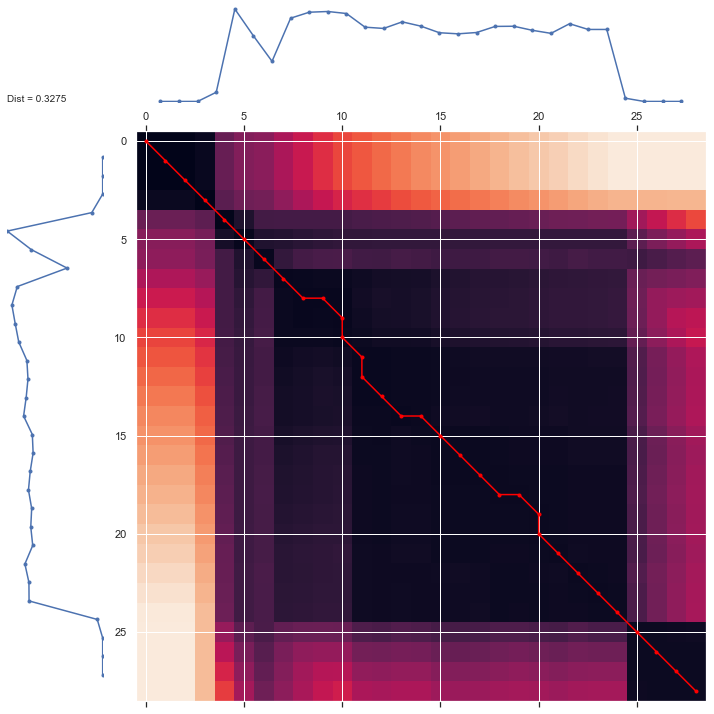

In [68]:
d, paths = dtw.warping_paths(hr1_30m, hr2_30m)
best_path = dtw.best_path(paths)
fig = dtwvis.plot_warpingpaths(hr1_30m, hr2_30m, paths, best_path)[0]

In [69]:
fig.savefig(IMAGES_DIR + 'ref_30min_hr_dtw.png')

(<Figure size 720x720 with 4 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x11ff85750>])

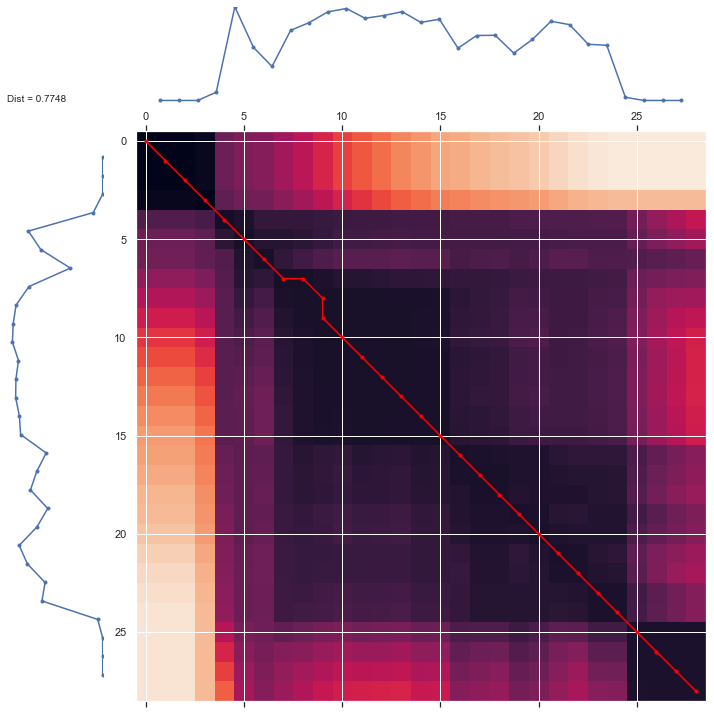

In [199]:
d, paths = dtw.warping_paths(rr1_30m, rr2_30m)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(rr1_30m, rr2_30m, paths, best_path)

# Calculate distances for 5min reference time series

### Read

In [47]:
df5m = pd.read_csv(FILE_5MIN, index_col='timestamp')

In [48]:
df5m.head()

,heart_rate_1,respiration_rate_1,mss1,heart_rate_2,respiration_rate_2,mss2
timestamp,,,,,,
2020-10-11 20:00:00+00:00,0.0,0.0,378.904930,0.0,0.0,372.207746
2020-10-11 20:05:00+00:00,0.0,0.0,369.880000,0.0,0.0,371.570000
2020-10-11 20:10:00+00:00,0.0,0.0,379.146667,0.0,0.0,361.596667
2020-10-11 20:15:00+00:00,0.0,0.0,376.313333,0.0,0.0,370.686667
2020-10-11 20:20:00+00:00,0.0,0.0,384.176667,0.0,0.0,379.140000


### Normalise Data

In [49]:
mean_5m = df5m.mean()
std_5m = df5m.std()

In [50]:
df5_normal = (df5m - mean_5m)/std_5m

In [51]:
df5_normal.head()

,heart_rate_1,respiration_rate_1,mss1,heart_rate_2,respiration_rate_2,mss2
timestamp,,,,,,
2020-10-11 20:00:00+00:00,-1.604874,-1.525357,-1.244549,-1.593136,-1.498098,-1.177905
2020-10-11 20:05:00+00:00,-1.604874,-1.525357,-1.258434,-1.593136,-1.498098,-1.178828
2020-10-11 20:10:00+00:00,-1.604874,-1.525357,-1.244177,-1.593136,-1.498098,-1.193253
2020-10-11 20:15:00+00:00,-1.604874,-1.525357,-1.248536,-1.593136,-1.498098,-1.180105
2020-10-11 20:20:00+00:00,-1.604874,-1.525357,-1.236439,-1.593136,-1.498098,-1.167878


### Transpose

In [52]:
df5m_matrix = df5_normal.transpose()

In [53]:
df5m_matrix

timestamp,2020-10-11 20:00:00+00:00,2020-10-11 20:05:00+00:00,2020-10-11 20:10:00+00:00,2020-10-11 20:15:00+00:00,2020-10-11 20:20:00+00:00,2020-10-11 20:25:00+00:00,2020-10-11 20:30:00+00:00,2020-10-11 20:35:00+00:00,2020-10-11 20:40:00+00:00,2020-10-11 20:45:00+00:00,...,2020-10-12 09:15:00+00:00,2020-10-12 09:20:00+00:00,2020-10-12 09:25:00+00:00,2020-10-12 09:30:00+00:00,2020-10-12 09:35:00+00:00,2020-10-12 09:40:00+00:00,2020-10-12 09:45:00+00:00,2020-10-12 09:50:00+00:00,2020-10-12 09:55:00+00:00,2020-10-12 10:00:00+00:00
heart_rate_1,-1.604874,-1.604874,-1.604874,-1.604874,-1.604874,-1.604874,-1.604874,-1.604874,-1.604874,-1.604874,...,-1.604874,-1.604874,-1.604874,-1.604874,-1.604874,-1.604874,-1.604874,-1.604874,-1.604874,-1.604874
respiration_rate_1,-1.525357,-1.525357,-1.525357,-1.525357,-1.525357,-1.525357,-1.525357,-1.525357,-1.525357,-1.525357,...,-1.525357,-1.525357,-1.525357,-1.525357,-1.525357,-1.525357,-1.525357,-1.525357,-1.525357,-1.525357
mss1,-1.244549,-1.258434,-1.244177,-1.248536,-1.236439,-1.216003,-1.209008,-1.150909,-1.183146,-1.206679,...,-1.249988,-1.221936,-1.259967,-1.230259,-1.192530,-1.014260,-1.142186,-1.104242,-1.232444,-1.269312
heart_rate_2,-1.593136,-1.593136,-1.593136,-1.593136,-1.593136,-1.593136,-1.593136,-1.593136,-1.593136,-1.593136,...,-1.593136,-1.593136,-1.593136,-1.593136,-1.593136,-1.593136,-1.593136,-1.593136,-1.593136,-1.593136
respiration_rate_2,-1.498098,-1.498098,-1.498098,-1.498098,-1.498098,-1.498098,-1.498098,-1.498098,-1.498098,-1.498098,...,-1.498098,-1.498098,-1.498098,-1.498098,-1.498098,-1.498098,-1.498098,-1.498098,-1.498098,-1.498098
mss2,-1.177905,-1.178828,-1.193253,-1.180105,-1.167878,-1.191590,-1.206320,-1.185896,-1.189517,-1.192887,...,-1.203822,-1.196971,-1.188258,-1.207086,-1.194314,-1.192651,-1.199237,-1.193335,-1.195336,-1.185782


### Euclidean distance

In [54]:
from sklearn.metrics.pairwise import euclidean_distances

In [55]:
hr_5m = df5m_matrix.loc[['heart_rate_1', 'heart_rate_2']]
rr_5m = df5m_matrix.loc[['respiration_rate_1', 'respiration_rate_2']]
mss_5m = df5m_matrix.loc[['mss1', 'mss2']]

In [56]:
dist_matrix_5m_hr = euclidean_distances(hr_5m, hr_5m)
dist_matrix_5m_rr = euclidean_distances(rr_5m, rr_5m)
dist_matrix_5m_mss = euclidean_distances(mss_5m, mss_5m)

In [57]:
print(dist_matrix_5m_hr)
print('')
print(dist_matrix_5m_rr)
print('')
print(dist_matrix_5m_mss)

[[2.38418579e-07 2.09500218e+00]
 [2.09500218e+00 0.00000000e+00]]

[[0.         3.64426817]
 [3.64426817 0.        ]]

[[4.76837158e-07 1.99338663e+00]
 [1.99338663e+00 0.00000000e+00]]


Euclidean Distance between the HR 30min: 2.1

Euclidean Distance between the RR 1h: 3.64

Euclidean Distance between the MSS 1h: 1.99

### DTW

In [58]:
# https://dtaidistance.readthedocs.io/en/latest/index.html
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

In [59]:
hr1_5m = df5m_matrix.loc['heart_rate_1']
hr2_5m = df5m_matrix.loc['heart_rate_2']

rr1_5m = df5m_matrix.loc['respiration_rate_1']
rr2_5m = df5m_matrix.loc['respiration_rate_2']

mss1_5m = df5m_matrix.loc['mss1']
mss2_5m = df5m_matrix.loc['mss2']

In [82]:
hr_5m_distance = dtw.distance(hr1_5m, hr2_5m)
print(hr_5m_distance)

1.6003459832492914


In [60]:
rr_5m_distance = dtw.distance(rr1_5m, rr2_5m)
print(rr_5m_distance)

2.5857693523301144


In [61]:
mss_5m_distance = dtw.distance(mss1_5m, mss2_5m)
print(mss_5m_distance)

1.6746957888440892


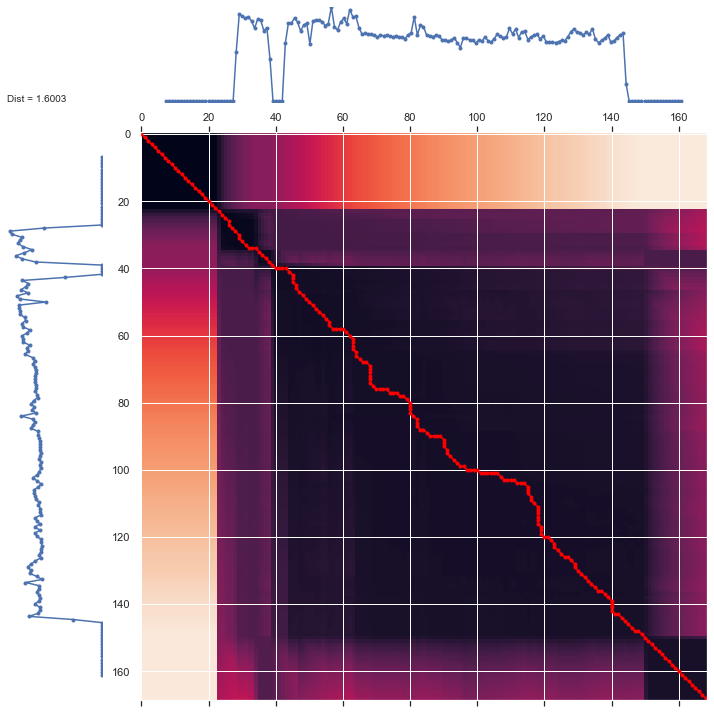

In [84]:
d, paths = dtw.warping_paths(hr1_5m, hr2_5m)
best_path = dtw.best_path(paths)
fig = dtwvis.plot_warpingpaths(hr1_5m, hr2_5m, paths, best_path)[0]

In [85]:
fig.savefig(IMAGES_DIR + 'ref_5min_hr_dtw.png')

(<Figure size 720x720 with 4 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1201ef290>])

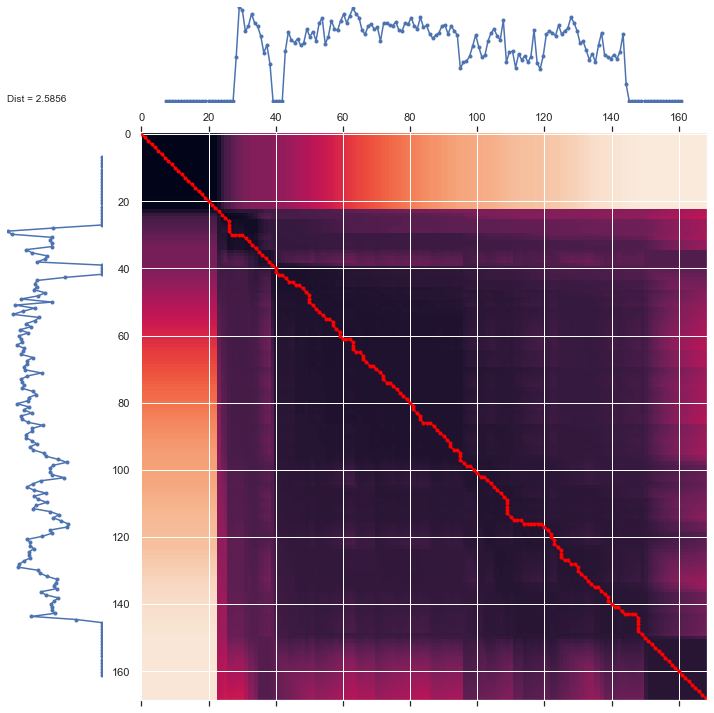

In [215]:
d, paths = dtw.warping_paths(rr1_5m, rr2_5m)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(rr1_5m, rr2_5m, paths, best_path)

# Calculate distances for 1min reference time series

### Read

In [62]:
df1m = pd.read_csv(FILE_1MIN, index_col='timestamp')

In [63]:
df1m.head()

,heart_rate_1,respiration_rate_1,mss1,heart_rate_2,respiration_rate_2,mss2
timestamp,,,,,,
2020-10-11 20:00:00+00:00,0.0,0.0,374.227273,0.0,0.0,367.704545
2020-10-11 20:01:00+00:00,0.0,0.0,397.966667,0.0,0.0,379.800000
2020-10-11 20:02:00+00:00,0.0,0.0,369.500000,0.0,0.0,379.100000
2020-10-11 20:03:00+00:00,0.0,0.0,367.250000,0.0,0.0,366.066667
2020-10-11 20:04:00+00:00,0.0,0.0,384.333333,0.0,0.0,367.166667


### Normalise Data

In [64]:
mean_1m = df1m.mean()
std_1m = df1m.std()

In [65]:
df1_normal = (df1m - mean_1m)/std_1m

In [66]:
df1_normal.head()

,heart_rate_1,respiration_rate_1,mss1,heart_rate_2,respiration_rate_2,mss2
timestamp,,,,,,
2020-10-11 20:00:00+00:00,-1.57744,-1.477789,-1.096736,-1.567796,-1.454047,-1.038419
2020-10-11 20:01:00+00:00,-1.57744,-1.477789,-1.064889,-1.567796,-1.454047,-1.023153
2020-10-11 20:02:00+00:00,-1.57744,-1.477789,-1.103077,-1.567796,-1.454047,-1.024036
2020-10-11 20:03:00+00:00,-1.57744,-1.477789,-1.106096,-1.567796,-1.454047,-1.040486
2020-10-11 20:04:00+00:00,-1.57744,-1.477789,-1.083178,-1.567796,-1.454047,-1.039098


### Transpose

In [67]:
df1m_matrix = df1_normal.transpose()

In [68]:
df1m_matrix

timestamp,2020-10-11 20:00:00+00:00,2020-10-11 20:01:00+00:00,2020-10-11 20:02:00+00:00,2020-10-11 20:03:00+00:00,2020-10-11 20:04:00+00:00,2020-10-11 20:05:00+00:00,2020-10-11 20:06:00+00:00,2020-10-11 20:07:00+00:00,2020-10-11 20:08:00+00:00,2020-10-11 20:09:00+00:00,...,2020-10-12 09:51:00+00:00,2020-10-12 09:52:00+00:00,2020-10-12 09:53:00+00:00,2020-10-12 09:54:00+00:00,2020-10-12 09:55:00+00:00,2020-10-12 09:56:00+00:00,2020-10-12 09:57:00+00:00,2020-10-12 09:58:00+00:00,2020-10-12 09:59:00+00:00,2020-10-12 10:00:00+00:00
heart_rate_1,-1.577440,-1.577440,-1.577440,-1.577440,-1.577440,-1.577440,-1.577440,-1.577440,-1.577440,-1.577440,...,-1.577440,-1.577440,-1.577440,-1.577440,-1.577440,-1.577440,-1.577440,-1.577440,-1.577440,-1.577440
respiration_rate_1,-1.477789,-1.477789,-1.477789,-1.477789,-1.477789,-1.477789,-1.477789,-1.477789,-1.477789,-1.477789,...,-1.477789,-1.477789,-1.477789,-1.477789,-1.477789,-1.477789,-1.477789,-1.477789,-1.477789,-1.477789
mss1,-1.096736,-1.064889,-1.103077,-1.106096,-1.083178,-1.085280,-1.092256,-1.115352,-1.132792,-1.087158,...,-0.763230,-1.011565,-1.084185,-1.101691,-1.046645,-1.082262,-1.083357,-1.073207,-1.114055,-1.112053
heart_rate_2,-1.567796,-1.567796,-1.567796,-1.567796,-1.567796,-1.567796,-1.567796,-1.567796,-1.567796,-1.567796,...,-1.567796,-1.567796,-1.567796,-1.567796,-1.567796,-1.567796,-1.567796,-1.567796,-1.567796,-1.567796
respiration_rate_2,-1.454047,-1.454047,-1.454047,-1.454047,-1.454047,-1.454047,-1.454047,-1.454047,-1.454047,-1.454047,...,-1.454047,-1.454047,-1.454047,-1.454047,-1.454047,-1.454047,-1.454047,-1.454047,-1.454047,-1.454047
mss2,-1.038419,-1.023153,-1.024036,-1.040486,-1.039098,-1.036595,-1.025698,-1.053044,-1.020018,-1.032345,...,-1.047112,-1.031230,-1.031504,-1.076604,-1.034996,-1.035921,-1.054412,-1.045556,-1.068842,-1.039609


### Euclidean distance

In [69]:
from sklearn.metrics.pairwise import euclidean_distances

In [70]:
hr_1m = df1m_matrix.loc[['heart_rate_1', 'heart_rate_2']]
rr_1m = df1m_matrix.loc[['respiration_rate_1', 'respiration_rate_2']]
mss_1m = df1m_matrix.loc[['mss1', 'mss2']]

In [71]:
dist_matrix_1m_hr = euclidean_distances(hr_1m, hr_1m)
dist_matrix_1m_rr = euclidean_distances(rr_1m, rr_1m)
dist_matrix_1m_mss = euclidean_distances(mss_1m, mss_1m)

In [72]:
print(dist_matrix_1m_hr)
print('')
print(dist_matrix_1m_rr)
print('')
print(dist_matrix_1m_mss)

[[0.00000000e+00 7.45544720e+00]
 [7.45544720e+00 1.71926082e-06]]

[[2.13248060e-06 1.05679255e+01]
 [1.05679255e+01 0.00000000e+00]]

[[6.74349576e-07 1.15020939e+01]
 [1.15020939e+01 0.00000000e+00]]


Euclidean Distance between the HR 30min: 7.45

Euclidean Distance between the RR 1h: 10.57

Euclidean Distance between the RR 1h: 11.5

### DTW

In [73]:
# https://dtaidistance.readthedocs.io/en/latest/index.html
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

In [74]:
hr1_1m = df1m_matrix.loc['heart_rate_1']
hr2_1m = df1m_matrix.loc['heart_rate_2']

rr1_1m = df1m_matrix.loc['respiration_rate_1']
rr2_1m = df1m_matrix.loc['respiration_rate_2']

mss1_1m = df1m_matrix.loc['mss1']
mss2_1m = df1m_matrix.loc['mss2']

In [99]:
hr_1m_distance = dtw.distance(hr1_1m, hr2_1m)
print(hr_1m_distance)

3.888862580497712


In [75]:
rr_1m_distance = dtw.distance(rr1_1m, rr2_1m)
print(rr_1m_distance)

5.810633383715957


In [76]:
mss_1m_distance = dtw.distance(mss1_1m, mss2_1m)
print(mss_1m_distance)

5.575821092036987


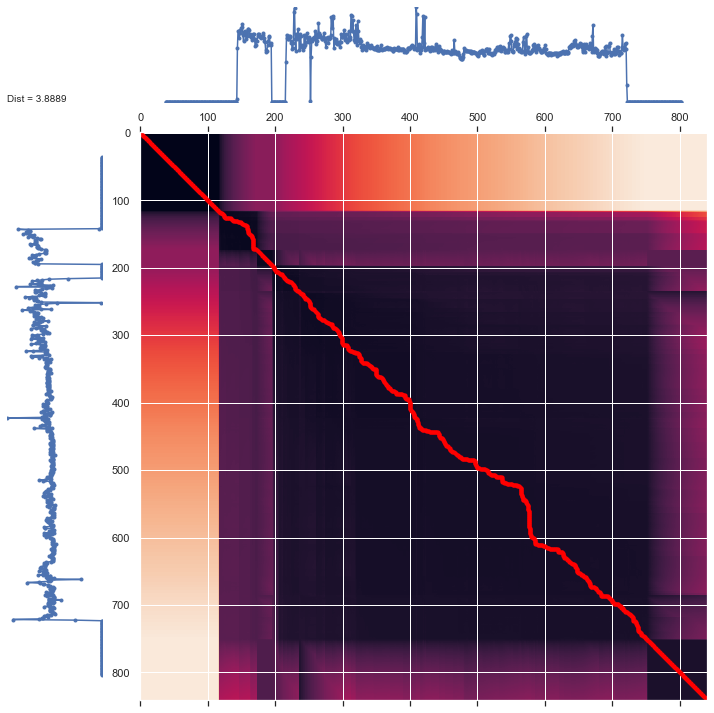

In [100]:
d, paths = dtw.warping_paths(hr1_1m, hr2_1m)
best_path = dtw.best_path(paths)
fig = dtwvis.plot_warpingpaths(hr1_1m, hr2_1m, paths, best_path)[0]

In [101]:
fig.savefig(IMAGES_DIR + 'ref_1min_hr_dtw.png')

(<Figure size 720x720 with 4 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x11fccfa10>])

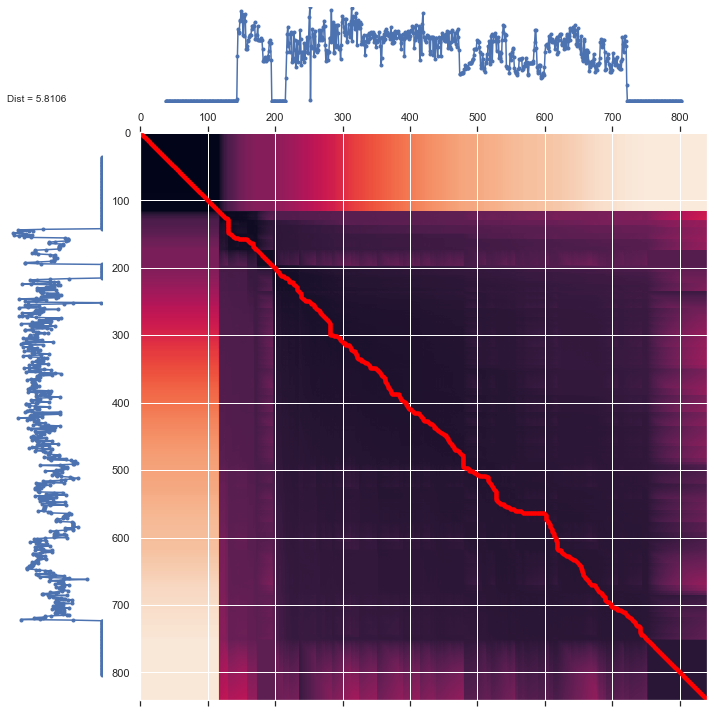

In [231]:
d, paths = dtw.warping_paths(rr1_1m, rr2_1m)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(rr1_1m, rr2_1m, paths, best_path)